### Vehicle Accident Prediction notebook

In [1]:
from platform import python_version
print("python_version:",python_version())
!jupyter kernelspec list
#!jupyter kernelspec remove vehicle_accident_venv

python_version: 3.8.5
Available kernels:
  python3                  /Users/ocean/PycharmProjects/vehicle_accident_prediction/vehicle_accident_venv/lib/python3.8/site-packages/ipykernel/resources
  vehicle_accident_venv    /Users/ocean/Library/Jupyter/kernels/vehicle_accident_venv


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import random
random.seed(4)
pd.options.display.max_columns = None

In [3]:
# load the datasets:
accident_pred_df1 = pd.read_csv("/Users/ocean/PycharmProjects/vehicle_accident_prediction/data/driver_vehicle_road_df.csv")
accident_pred_df1.head()

,driver_name,driver_age,is_driver_alcholic,is_driver_has_kids,driver_marital_status,driver_ownership,driver_license_age,vehicle_year,vehicle_age,vehicle_mileage,vehicle_last_maintaince,road_condition,season,road_terrain,day,month
0,Edward Odonnell,30,no,yes,M,no,18,2013,9,39934,2015,off_road,summer,terai,18,7
1,Tiffany Hinton,52,yes,yes,S,no,12,2012,6,34814,2019,gravel,autumn,terai,29,7
2,Adrian Mosley,56,no,yes,S,no,11,2011,22,254628,2016,off_road,rainy,terai,1,1
3,Dana White,24,yes,no,M,no,10,2012,4,78890,2020,off_road,summer,mountain,1,5
4,Robert Ochoa,37,no,no,S,no,23,2006,23,193603,2017,gravel,rainy,hilly,23,4


In [4]:
## add the dummy label which will be used for prediction
accident_pred_df1['accident'] = np.random.binomial(n=1, p=0.2, size=[1000])
accident_pred_df1[['accident']].head()

,accident
0,0
1,0
2,0
3,0
4,0


### Step 2: Data PreProcessing

In [5]:
accident_pred_df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   driver_name              1000 non-null   object
 1   driver_age               1000 non-null   int64 
 2   is_driver_alcholic       1000 non-null   object
 3   is_driver_has_kids       1000 non-null   object
 4   driver_marital_status    1000 non-null   object
 5   driver_ownership         1000 non-null   object
 6   driver_license_age       1000 non-null   int64 
 7   vehicle_year             1000 non-null   int64 
 8   vehicle_age              1000 non-null   int64 
 9   vehicle_mileage          1000 non-null   int64 
 10  vehicle_last_maintaince  1000 non-null   int64 
 11  road_condition           1000 non-null   object
 12  season                   1000 non-null   object
 13  road_terrain             1000 non-null   object
 14  day                      1000 non-null   

In [6]:
accident_pred_df1.describe()

,driver_age,driver_license_age,vehicle_year,vehicle_age,vehicle_mileage,vehicle_last_maintaince,day,month,accident
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,39.253000,14.051000,2009.914000,12.948000,151843.300000,2017.515000,15.040000,6.672000,0.214000
std,12.543298,6.924185,6.031167,7.077668,85227.601228,1.696069,8.331615,3.491218,0.410332
min,18.000000,2.000000,2000.000000,1.000000,5085.000000,2015.000000,1.000000,1.000000,0.000000
25%,29.000000,8.000000,2004.750000,7.000000,72881.750000,2016.000000,8.000000,4.000000,0.000000
50%,39.000000,14.000000,2010.000000,13.000000,154164.000000,2017.000000,15.000000,7.000000,0.000000
75%,51.000000,20.000000,2015.000000,19.000000,223888.750000,2019.000000,22.000000,10.000000,0.000000
max,60.000000,25.000000,2020.000000,25.000000,299775.000000,2020.000000,29.000000,12.000000,1.000000


In [7]:
accident_pred_df1.head()

,driver_name,driver_age,is_driver_alcholic,is_driver_has_kids,driver_marital_status,driver_ownership,driver_license_age,vehicle_year,vehicle_age,vehicle_mileage,vehicle_last_maintaince,road_condition,season,road_terrain,day,month,accident
0,Edward Odonnell,30,no,yes,M,no,18,2013,9,39934,2015,off_road,summer,terai,18,7,0
1,Tiffany Hinton,52,yes,yes,S,no,12,2012,6,34814,2019,gravel,autumn,terai,29,7,0
2,Adrian Mosley,56,no,yes,S,no,11,2011,22,254628,2016,off_road,rainy,terai,1,1,0
3,Dana White,24,yes,no,M,no,10,2012,4,78890,2020,off_road,summer,mountain,1,5,0
4,Robert Ochoa,37,no,no,S,no,23,2006,23,193603,2017,gravel,rainy,hilly,23,4,0


In [8]:
accident_pred_df1.columns

Index(['driver_name', 'driver_age', 'is_driver_alcholic', 'is_driver_has_kids',
       'driver_marital_status', 'driver_ownership', 'driver_license_age',
       'vehicle_year', 'vehicle_age', 'vehicle_mileage',
       'vehicle_last_maintaince', 'road_condition', 'season', 'road_terrain',
       'day', 'month', 'accident'],
      dtype='object')

In [9]:
## tranform strings to some sort of numerical form 
"""
is_driver_alcholic
is_driver_has_kids
driver_marital_status
driver_ownership

road_condition
season
road_terrain

"""


'\nis_driver_alcholic\nis_driver_has_kids\ndriver_marital_status\ndriver_ownership\n\nroad_condition\nseason\nroad_terrain\n\n'

In [10]:
### use lebel encoding for 
from sklearn.preprocessing import LabelEncoder
# creating instance of labelencoder
labelencoder = LabelEncoder()
#labelencoder.fit_transform(data)
# Assigning numerical values and storing in another column

label_cols = ["is_driver_alcholic",
"is_driver_has_kids",
"driver_marital_status",
"driver_ownership"]

df = accident_pred_df1.apply(lambda x: labelencoder.fit_transform(x) if x.name in label_cols else x)
df.head()


,driver_name,driver_age,is_driver_alcholic,is_driver_has_kids,driver_marital_status,driver_ownership,driver_license_age,vehicle_year,vehicle_age,vehicle_mileage,vehicle_last_maintaince,road_condition,season,road_terrain,day,month,accident
0,Edward Odonnell,30,0,1,0,0,18,2013,9,39934,2015,off_road,summer,terai,18,7,0
1,Tiffany Hinton,52,1,1,1,0,12,2012,6,34814,2019,gravel,autumn,terai,29,7,0
2,Adrian Mosley,56,0,1,1,0,11,2011,22,254628,2016,off_road,rainy,terai,1,1,0
3,Dana White,24,1,0,0,0,10,2012,4,78890,2020,off_road,summer,mountain,1,5,0
4,Robert Ochoa,37,0,0,1,0,23,2006,23,193603,2017,gravel,rainy,hilly,23,4,0


In [11]:
onehot_cols = ["road_condition","season","road_terrain"]
#One-hot-encode the categorical columns.
from sklearn.preprocessing import OneHotEncoder
onehotencoding = OneHotEncoder(handle_unknown="ignore")
df_hot_encoded = onehotencoding.fit_transform(df[onehot_cols]).toarray()

#Convert it to df
df_hot_encoded = pd.DataFrame(df_hot_encoded, columns=onehotencoding.get_feature_names())
df_hot_encoded.head()

,x0_gravel,x0_off_road,x0_pitch,x1_autumn,x1_rainy,x1_summer,x1_winter,x2_hilly,x2_mountain,x2_terai
0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [12]:
#Extract only the columns that didnt need to be encoded
df_other_cols = df.drop(columns=onehot_cols)

#Concatenate the two dataframes : 
df  = pd.concat([df_other_cols,df_hot_encoded], axis =1)
df.head()

,driver_name,driver_age,is_driver_alcholic,is_driver_has_kids,driver_marital_status,driver_ownership,driver_license_age,vehicle_year,vehicle_age,vehicle_mileage,vehicle_last_maintaince,day,month,accident,x0_gravel,x0_off_road,x0_pitch,x1_autumn,x1_rainy,x1_summer,x1_winter,x2_hilly,x2_mountain,x2_terai
0,Edward Odonnell,30,0,1,0,0,18,2013,9,39934,2015,18,7,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,Tiffany Hinton,52,1,1,1,0,12,2012,6,34814,2019,29,7,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,Adrian Mosley,56,0,1,1,0,11,2011,22,254628,2016,1,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,Dana White,24,1,0,0,0,10,2012,4,78890,2020,1,5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,Robert Ochoa,37,0,0,1,0,23,2006,23,193603,2017,23,4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [13]:
# looks like we have preprocessed all columns to numericm except driver_name
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   driver_name              1000 non-null   object 
 1   driver_age               1000 non-null   int64  
 2   is_driver_alcholic       1000 non-null   int64  
 3   is_driver_has_kids       1000 non-null   int64  
 4   driver_marital_status    1000 non-null   int64  
 5   driver_ownership         1000 non-null   int64  
 6   driver_license_age       1000 non-null   int64  
 7   vehicle_year             1000 non-null   int64  
 8   vehicle_age              1000 non-null   int64  
 9   vehicle_mileage          1000 non-null   int64  
 10  vehicle_last_maintaince  1000 non-null   int64  
 11  day                      1000 non-null   int64  
 12  month                    1000 non-null   int64  
 13  accident                 1000 non-null   int64  
 14  x0_gravel                

In [14]:
### let's do some feature engineering 
# drop [driver_name ] cols it doesnot have any effect on accident

df = df.drop(["driver_name"],axis = 1)
df.head()



,driver_age,is_driver_alcholic,is_driver_has_kids,driver_marital_status,driver_ownership,driver_license_age,vehicle_year,vehicle_age,vehicle_mileage,vehicle_last_maintaince,day,month,accident,x0_gravel,x0_off_road,x0_pitch,x1_autumn,x1_rainy,x1_summer,x1_winter,x2_hilly,x2_mountain,x2_terai
0,30,0,1,0,0,18,2013,9,39934,2015,18,7,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,52,1,1,1,0,12,2012,6,34814,2019,29,7,0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0
2,56,0,1,1,0,11,2011,22,254628,2016,1,1,0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
3,24,1,0,0,0,10,2012,4,78890,2020,1,5,0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,37,0,0,1,0,23,2006,23,193603,2017,23,4,0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


### EDA

In [15]:
import seaborn as sns


In [16]:
df.groupby("vehicle_year")[['accident']].count().head()

,accident
vehicle_year,
2000,47
2001,40
2002,52
2003,53
2004,58


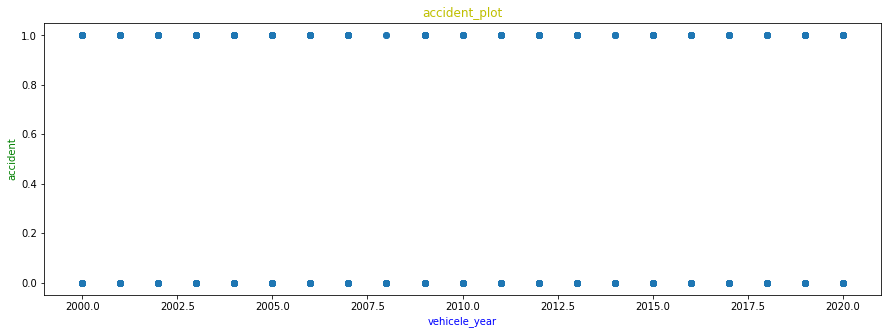

In [17]:
## scatter plot for two features
plt.figure(figsize=(15,5))
plt.scatter(df['vehicle_year'],df['accident'])
plt.title("accident_plot",color ='y')
plt.xlabel("vehicele_year",color = 'b')
plt.ylabel("accident",color = 'g')
plt.show()

The label for our data:
 0    786
1    214
Name: accident, dtype: int64


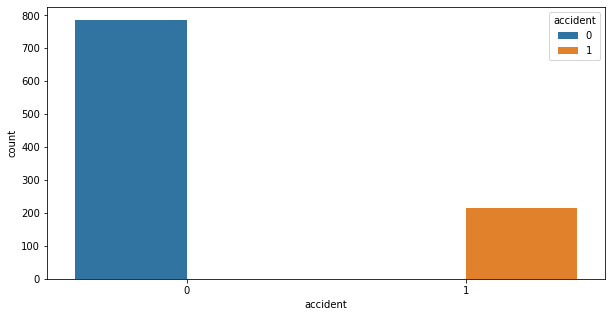

In [18]:
import warnings
warnings.filterwarnings("ignore")
print('The label for our data:\n',df['accident'].value_counts())
plt.figure(figsize=(10,5))
sns.countplot(df['accident'],hue = df['accident']);

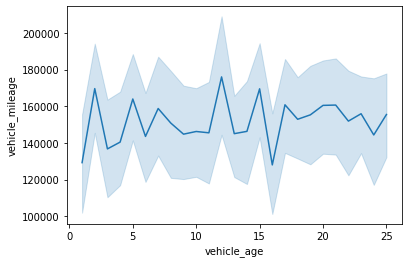

In [19]:
sns.lineplot(df['vehicle_age'],df['vehicle_mileage']);

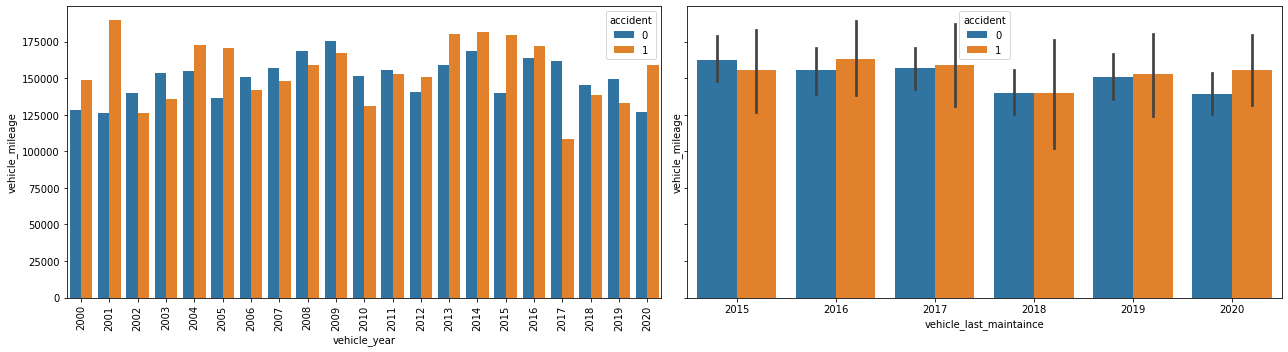

In [20]:
figs,axs = plt.subplots(1,2, figsize =(18,5),sharey=True)
ax1 = sns.barplot(df['vehicle_year'],df['vehicle_mileage'],hue = df['accident'],ax= axs[0],ci=None);
ax1.tick_params(labelrotation=90,axis ='x')
sns.barplot(df['vehicle_last_maintaince'],df['vehicle_mileage'],hue = df['accident'],ax=axs[1]);
figs.tight_layout()

## you can plot as many as you can

<Figure size 720x360 with 0 Axes>

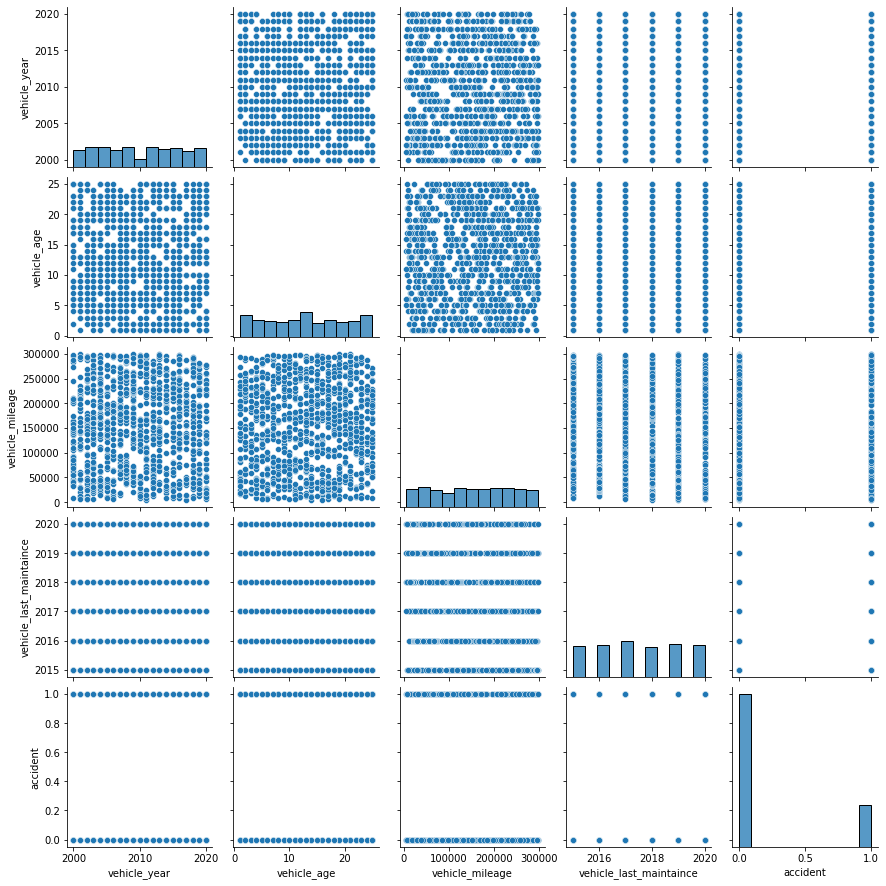

In [21]:
# lets plot some corelation
#sns.pairplot(df)
plt.figure(figsize=(10,5))
df_corr = df[['vehicle_year', 'vehicle_age', 'vehicle_mileage','vehicle_last_maintaince','accident']]
sns.pairplot(df_corr);

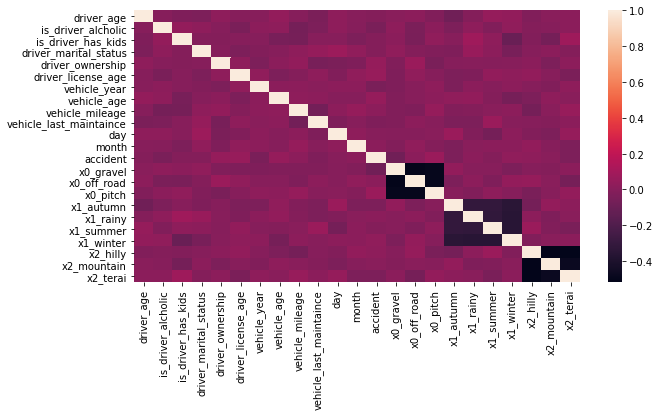

In [22]:
plt.figure(figsize=(10,5))
sns.heatmap(df.corr());

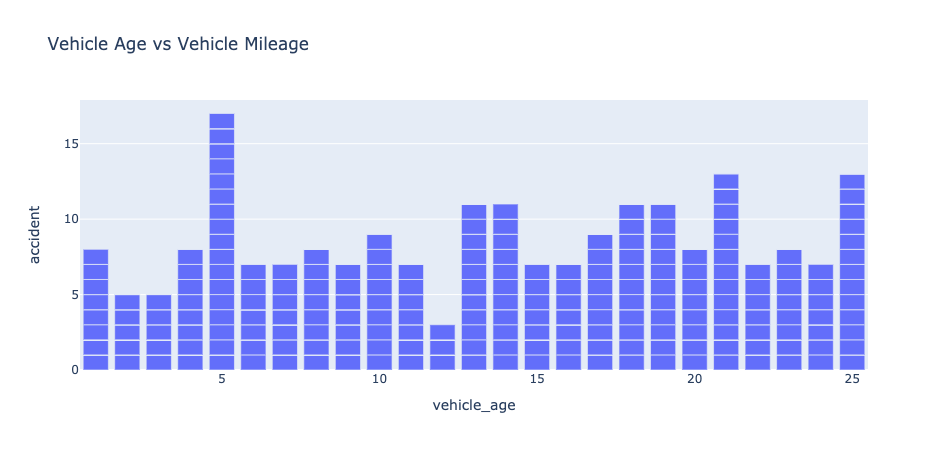

In [36]:
import plotly.express as px
fig = px.bar(df, x= 'vehicle_age',y='vehicle_mileage', title="Vehicle Age vs Vehicle Mileage")
fig.show()

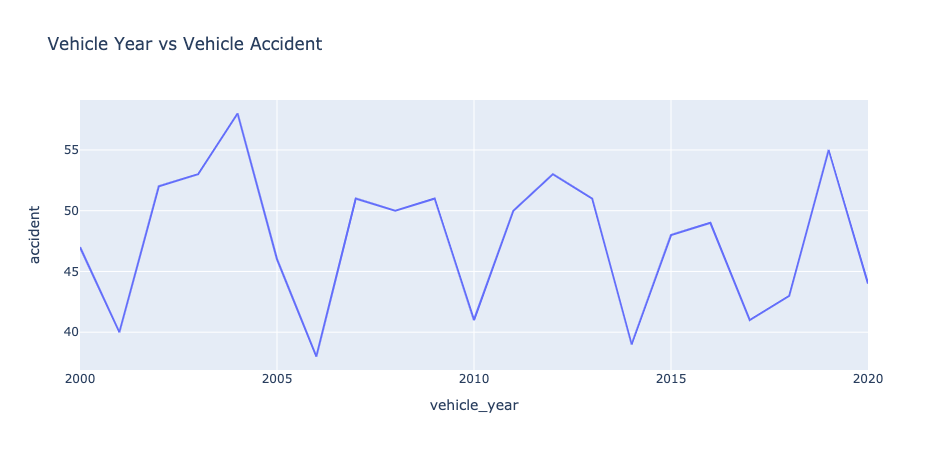

In [41]:
df_accident_by_year =  df.groupby("vehicle_year")[['accident']].count().reset_index()
fig = px.line(df_accident_by_year, x= 'vehicle_year',y='accident', title="Vehicle Year vs Vehicle Accident")
fig.show()

In [43]:
import plotly.graph_objects as go # or plotly.express as px
fig = go.Figure() # or any Plotly Express function e.g. px.bar(...)
# fig.add_trace( ... )
# fig.update_layout( ... )

df_accident_by_year =  df.groupby("vehicle_year")[['accident']].count().reset_index()
fig = px.line(df_accident_by_year, x= 'vehicle_year',y='accident', title="Vehicle Year vs Vehicle Accident")

import dash
import dash_core_components as dcc
import dash_html_components as html

app = dash.Dash()
app.layout = html.Div([
    dcc.Graph(figure=fig)
])

app.run_server(debug=True, use_reloader=False)  # Turn off reloader if inside Jupyter

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app "__main__" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: on


In [ ]:
###Model Building...